## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

  import numpy.matlib as npm

  autumn = cm.get_cmap('autumn', 256)

  winter = cm.get_cmap('winter_r', 256)



In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

absolute_root_path /scratch/asr655/neuroinformatics/GeneEx2Conn
absolute_root_path /scratch/asr655/neuroinformatics/GeneEx2Conn


<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 3.6%
RAM Usage: 6.6%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  5% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

Spinning gene expression
Spin index for seed 42: 9
Mean error rank for spin index 9: 263.3333333333333
Number of components for 95% variance PCA: 27
Spinning gene expression
Spin index for seed 42: 9
Mean error rank for spin index 9: 263.3333333333333
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome_PCA
processing_type:  None
features ['transcriptome_PCA']
X generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: zhrk2gvw
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/zhrk2gvw
Initialized sweep with ID: zhrk2gvw
1
3
4
BEST CONFIG {'input_dim': 54, 'binarize': False, 'learning_rate': 0.0005, 'batch_size': 512, 'regularization': 'l2', 'lambda_reg': 0.01, 'epochs': 100}
Number of learnable parameters in bilinear CM layer: 730


  warnings.warn(



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB
Best val loss so far at epoch 1: 134.0391
Best val loss so far at epoch 2: 32.3885
Best val loss so far at epoch 3: 10.9301
Best val loss so far at epoch 4: 4.9485
Best val loss so far at epoch 5: 2.6373
Epoch 5/100, Train Loss: 1.2493, Val Loss: 2.6373, Time: 1.08s
Best val loss so far at epoch 6: 1.4978
Best val loss so far at epoch 7: 0.8986
Best val loss so far at epoch 8: 0.5619
Best val loss so far at epoch 9: 0.3593
Best val loss so far at epoch 10: 0.2290
Epoch 10/100, Train Loss: 0.1025, Val Loss: 0.2290, Time: 1.08s
Best val loss so far at epoch 11: 0.1510
Best val loss so far at epoch 12: 0.1011
Best val loss so far at epoch 13: 0.0713
Best val loss so far at epoch 14: 0.0533
Best val loss so far at epoch 15: 0.0432
Epoch 15/100, Train Loss: 0.0337, Val Loss: 0.0432, Time: 0.77s
Best val loss so far at epoch 16: 0.0378
Best val loss so far at epoch 17: 0.0352
Best val loss so far at epoch 18: 0.0342


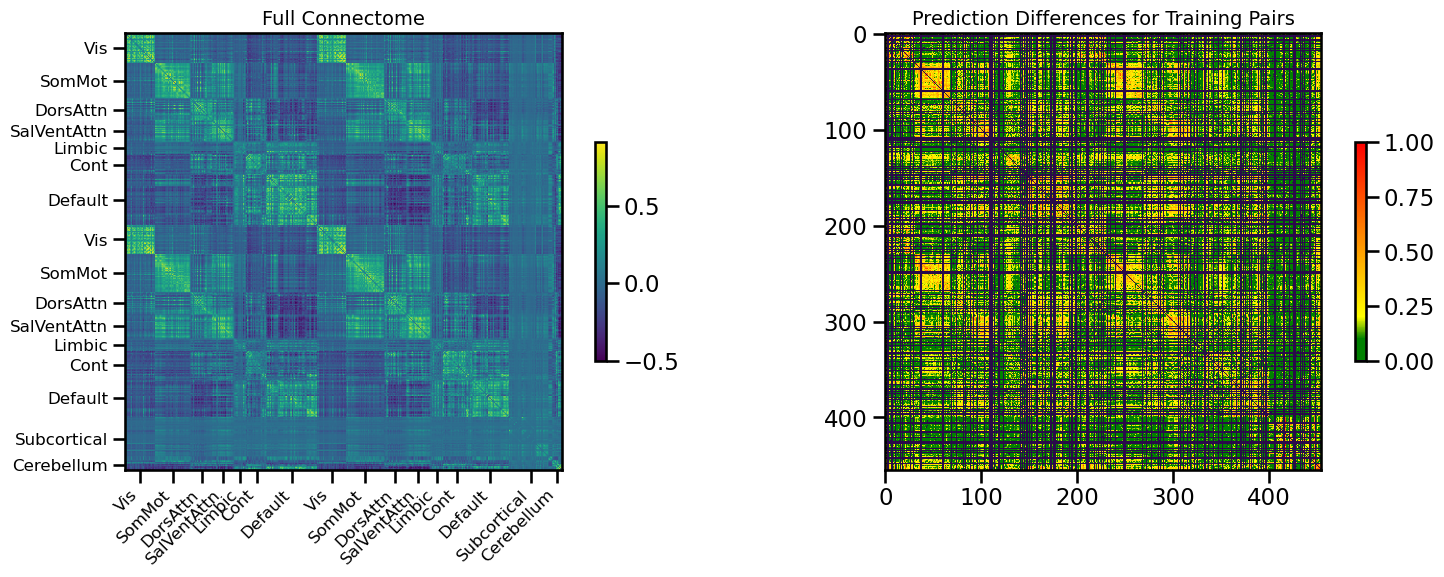

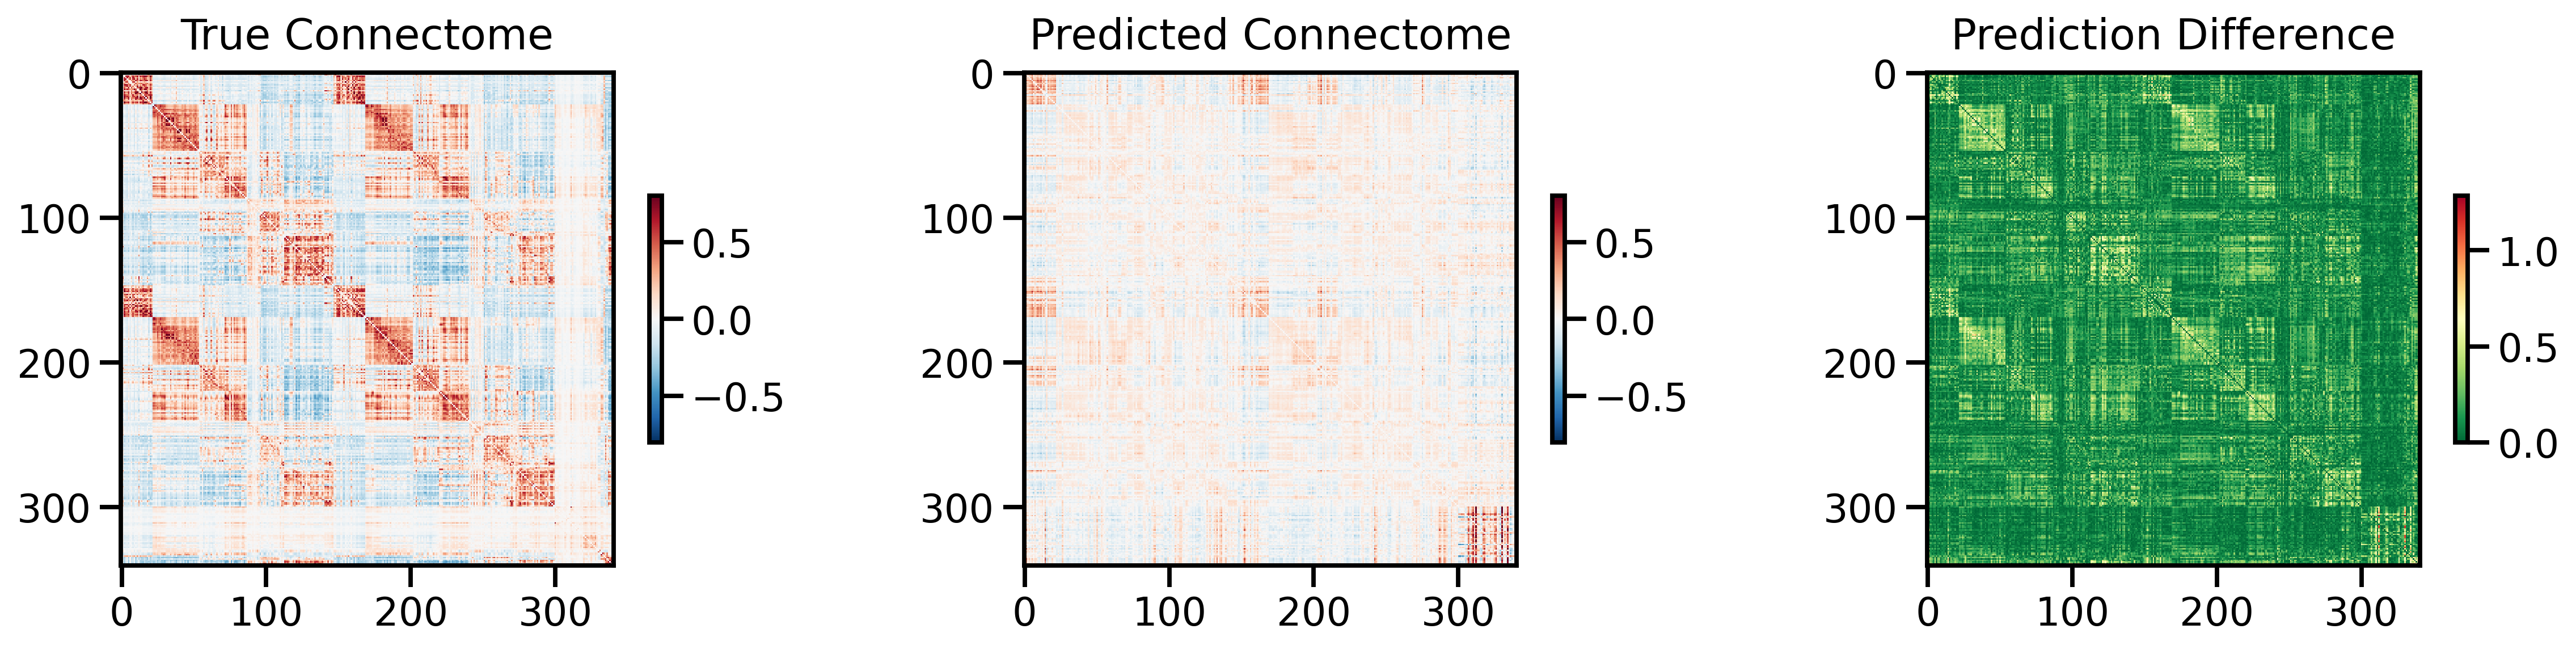

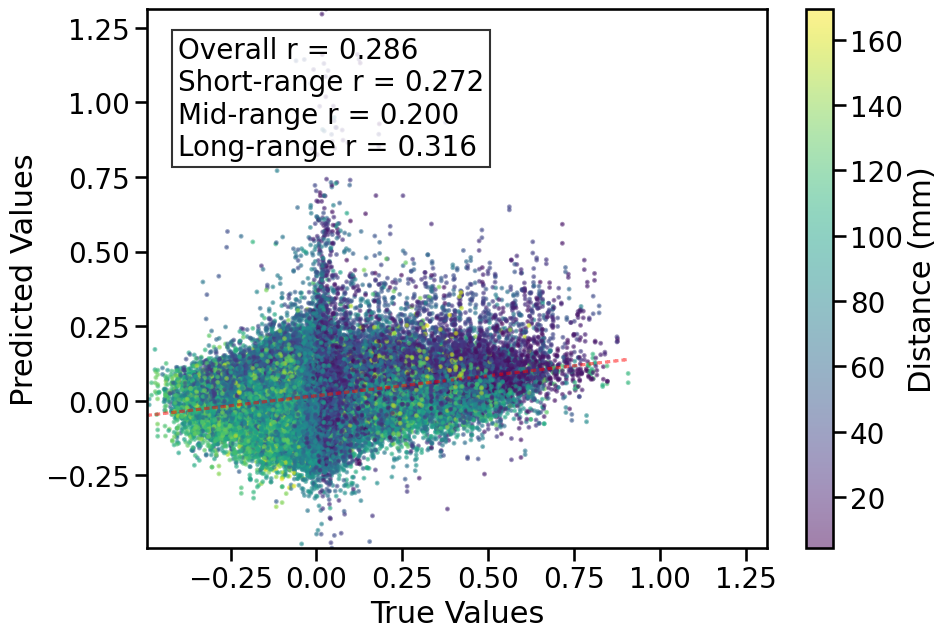

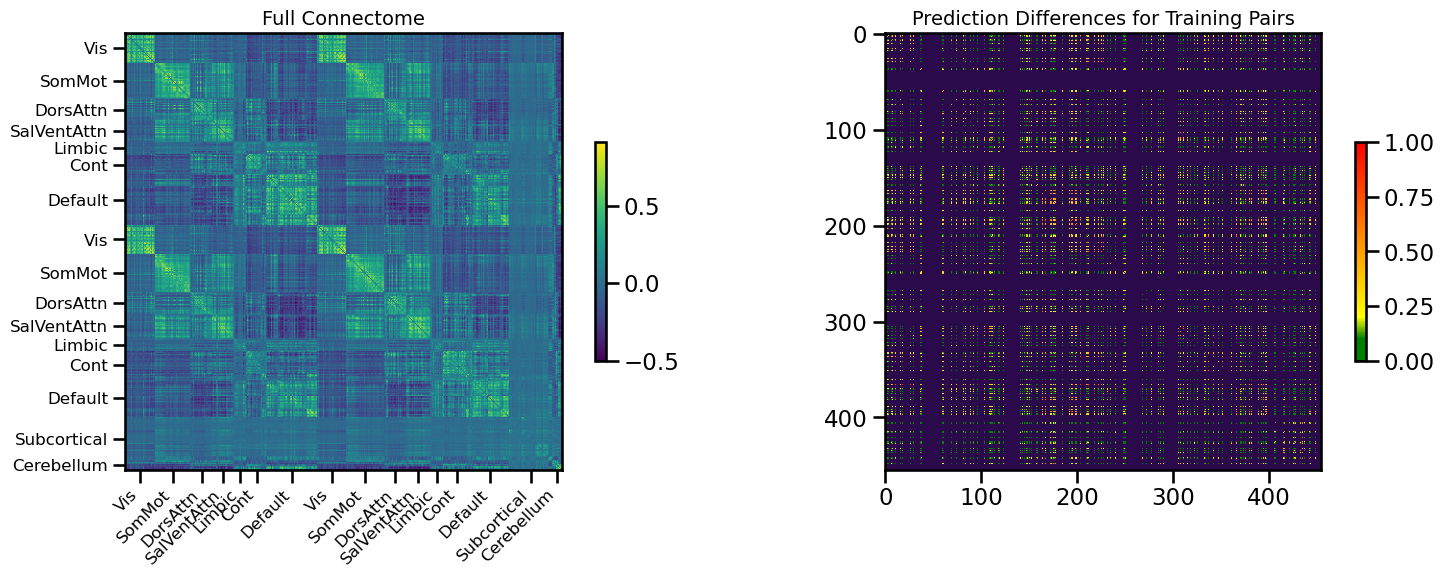

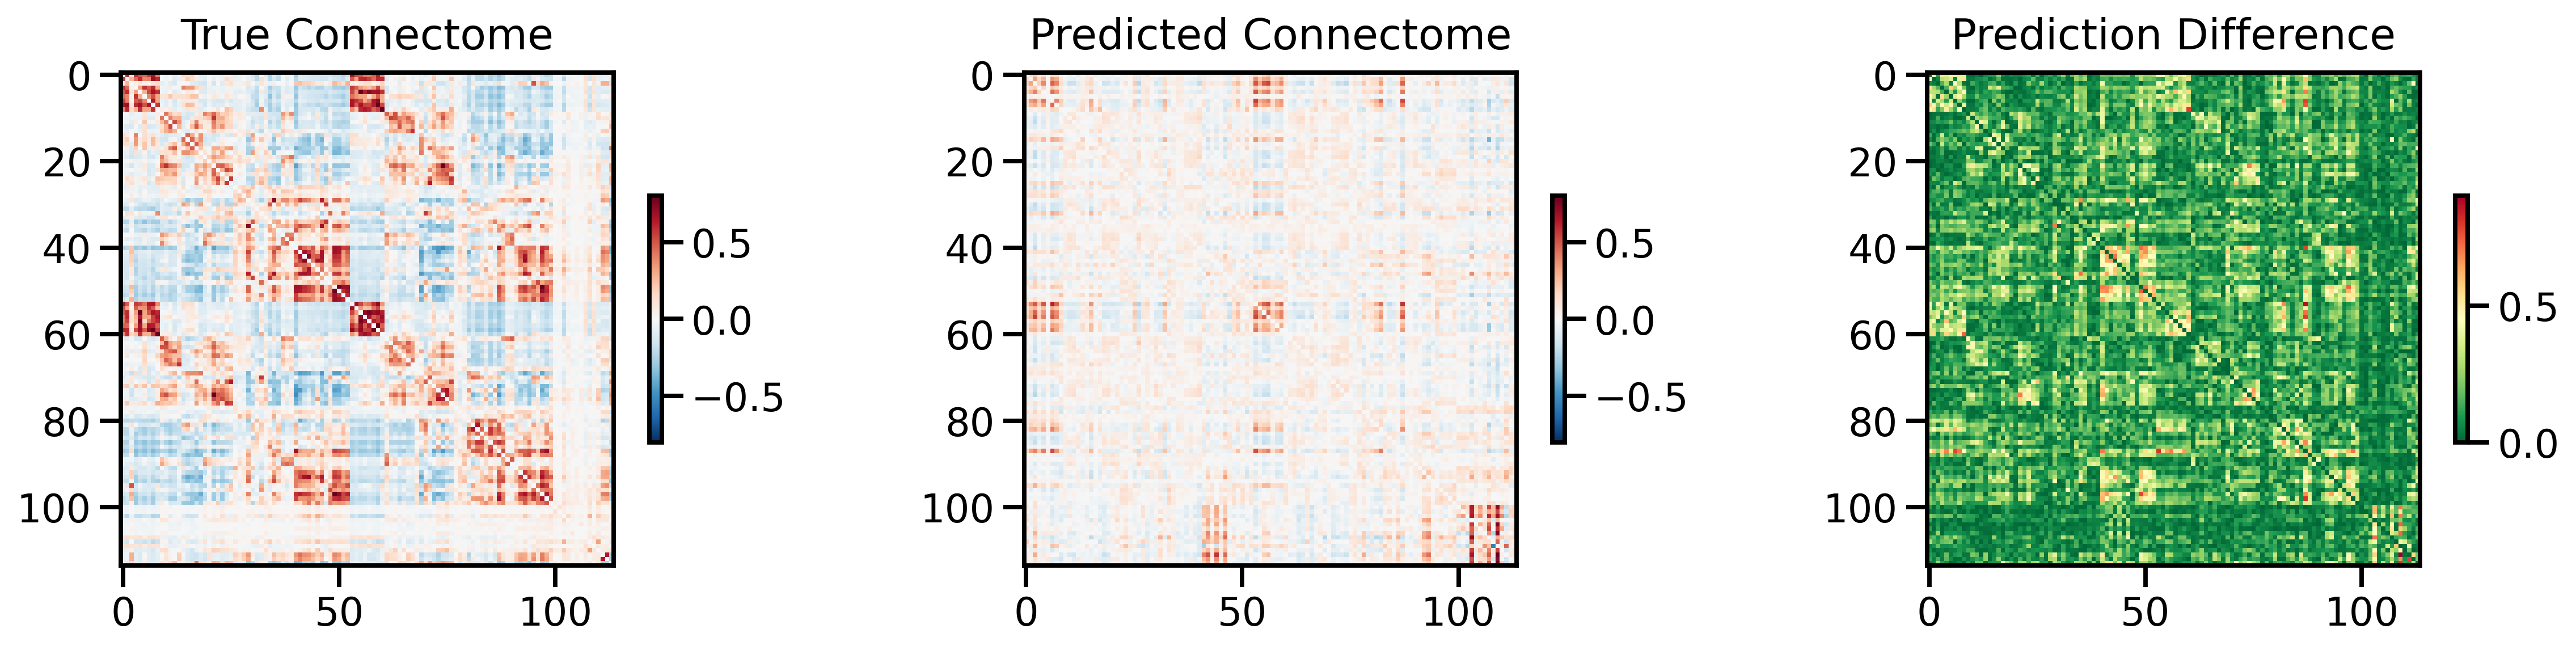

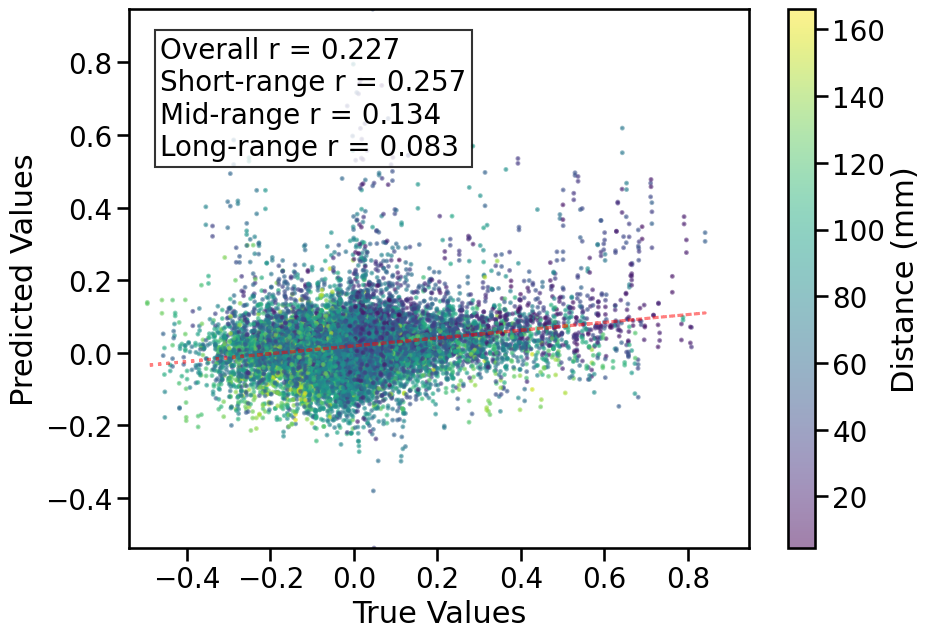


TRAIN METRICS: {'mse': 0.031704523, 'mae': 0.13607258, 'r2': 0.04850055916173812, 'pearson_r': 0.2858407667971292, 'short_r': 0.2718634187799632, 'mid_r': 0.199863242054586, 'long_r': 0.315747582023539, 'geodesic_distance': 34.65142390849227}
TEST METRICS: {'mse': 0.036375772, 'mae': 0.14350767, 'r2': -0.009904652499929556, 'pearson_r': 0.2274368523241762, 'short_r': 0.25681429526005267, 'mid_r': 0.13418723208920952, 'long_r': 0.08278907869253652, 'geodesic_distance': 19.548467035439067}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'learning_rate': 0.0005, 'epochs': 100, 'batch_size': 512, 'regularization': 'l2', 'lambda_reg': 0.01}
CPU Usage: 4.9%
RAM Usage: 6.8%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  6% |
Sim complete
Simulation completed in 118.30 seconds (1.97 minutes)


36742

In [8]:
single_sim_run(
              feature_type=[{'transcriptome_PCA': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='bilinear_CM',
              use_gpu=True, 
              null_model='spin', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

Spinning gene expression
Spin index for seed 42: 9
Mean error rank for spin index 9: 263.3333333333333
Number of components for 95% variance PCA: 27
Spinning gene expression
Spin index for seed 42: 9
Mean error rank for spin index 9: 263.3333333333333
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: pkm8zucz
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/pkm8zucz
Initialized sweep with ID: pkm8zucz


  warnings.warn(



1
3
4
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'activation': 'none', 'learning_rate': 0.0001, 'batch_size': 256, 'regularization': 'l2', 'lambda_reg': 0.001, 'shared_weights': True, 'reduced_dim': 10, 'epochs': 125}
Number of learnable parameters in bilinear low rank model: 73800
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.06 GB
Best val loss so far at epoch 1: 0.0364
Best val loss so far at epoch 2: 0.0357
Best val loss so far at epoch 3: 0.0357
Best val loss so far at epoch 4: 0.0348
Epoch 5/125, Train Loss: 0.0303, Val Loss: 0.0360, Time: 2.49s
Best val loss so far at epoch 8: 0.0340
Best val loss so far at epoch 9: 0.0339
Best val loss so far at epoch 10: 0.0338
Epoch 10/125, Train Loss: 0.0261, Val Loss: 0.0338, Time: 2.54s
Epoch 15/125, Train Loss: 0.0258, Val Loss: 0.0340, Time: 2.46s
Epoch 20/125, Train Loss: 0.0256, Val Loss: 0.0343, Time: 2.46s
Epoch 25/125, Train Loss: 0.0252, Val Loss: 0.0348, Time: 2.80s

LR REDUCED: 0.000100 → 0.000030

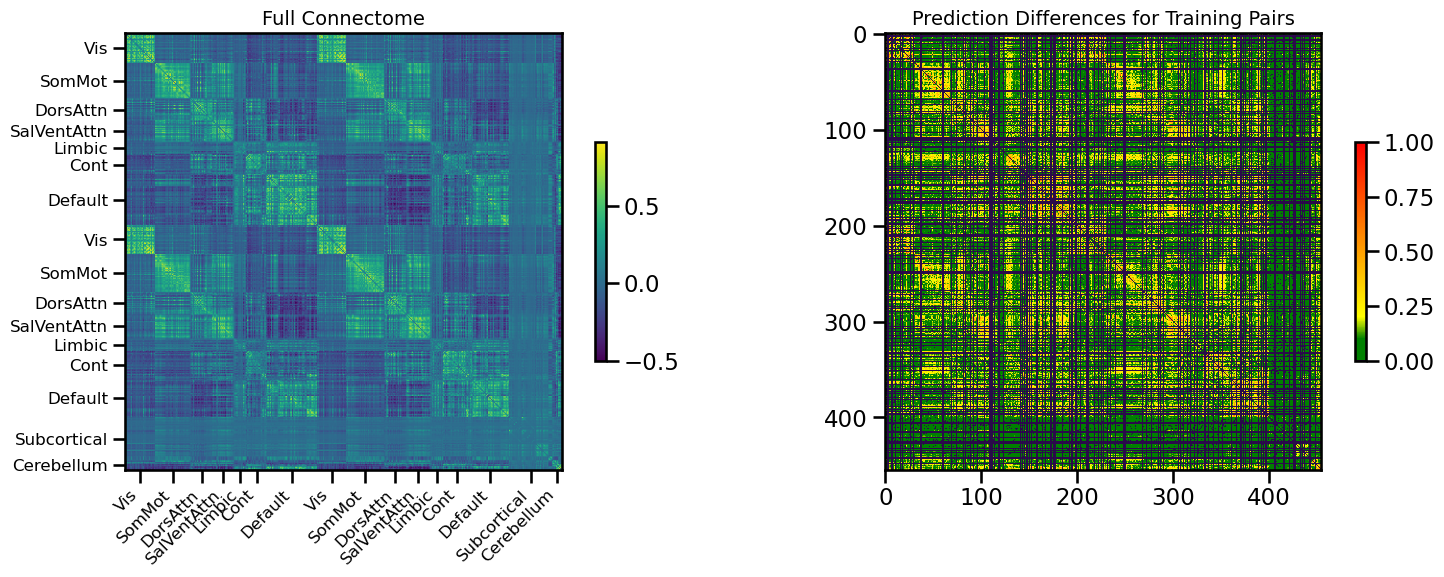

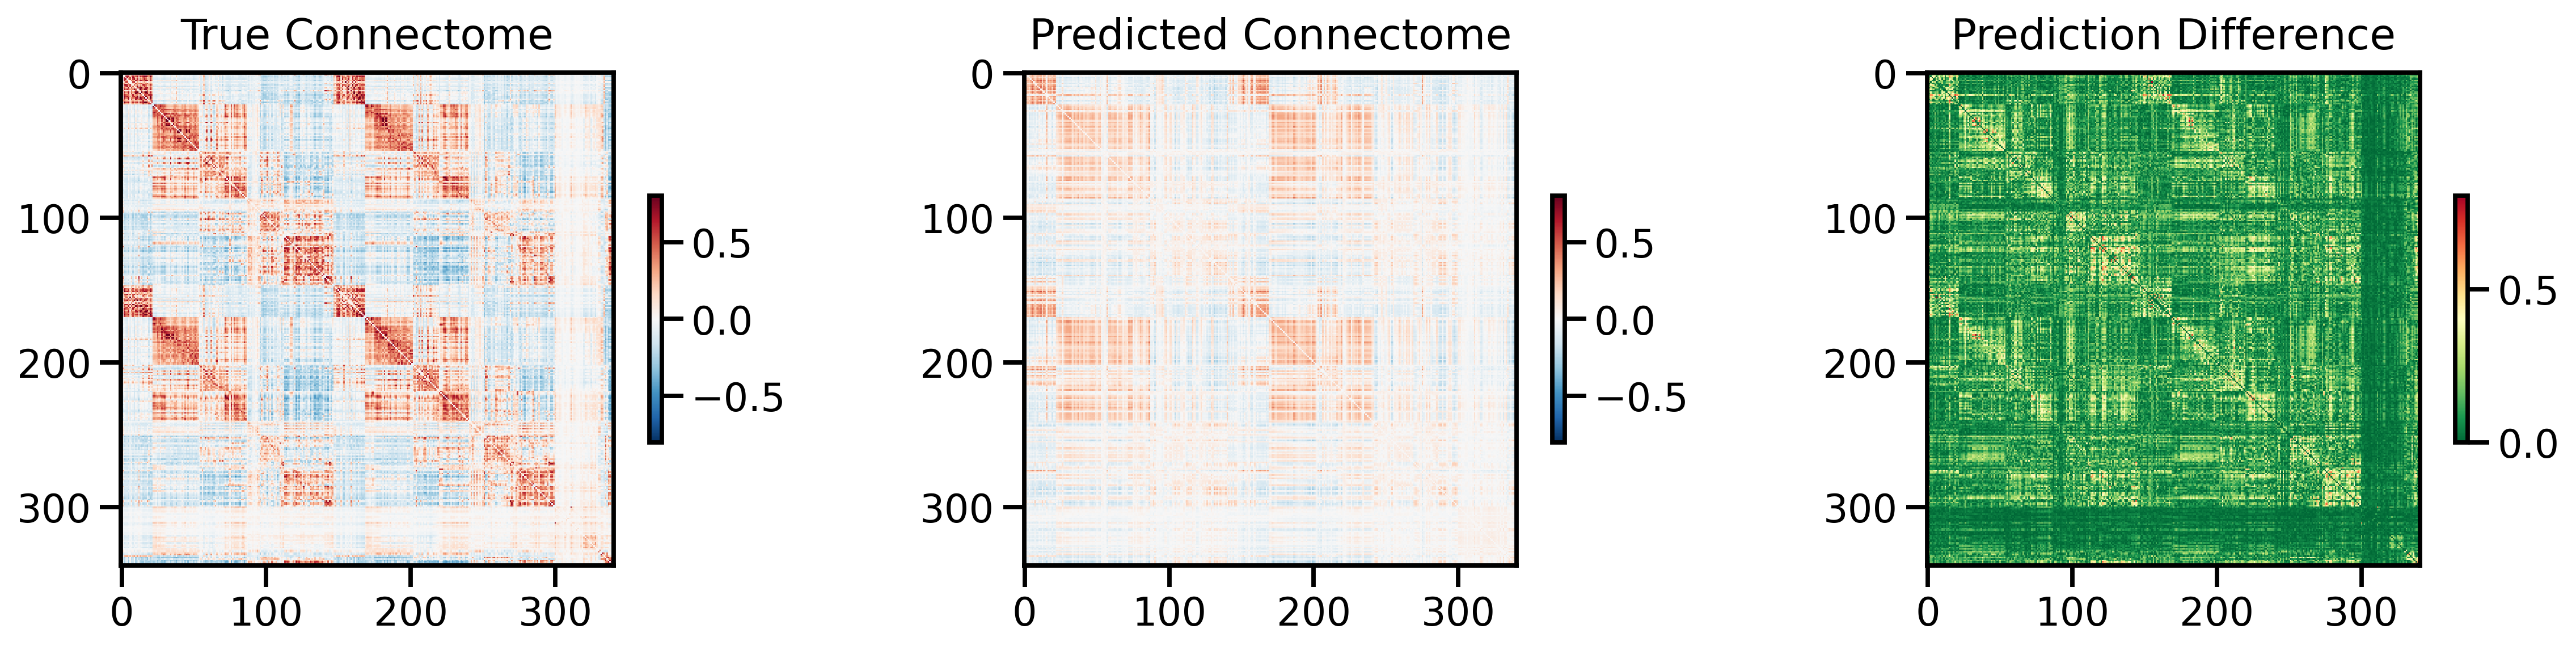

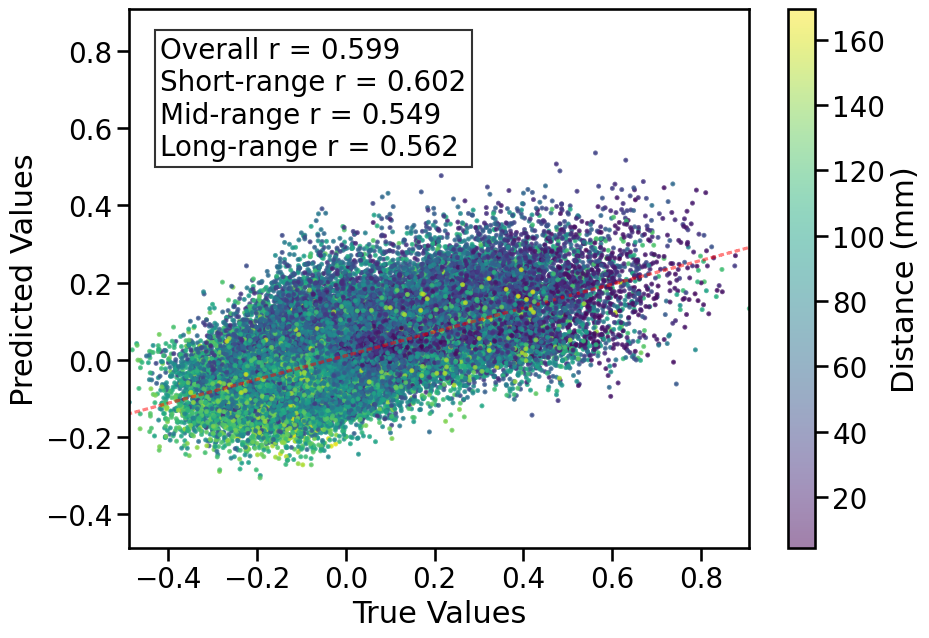

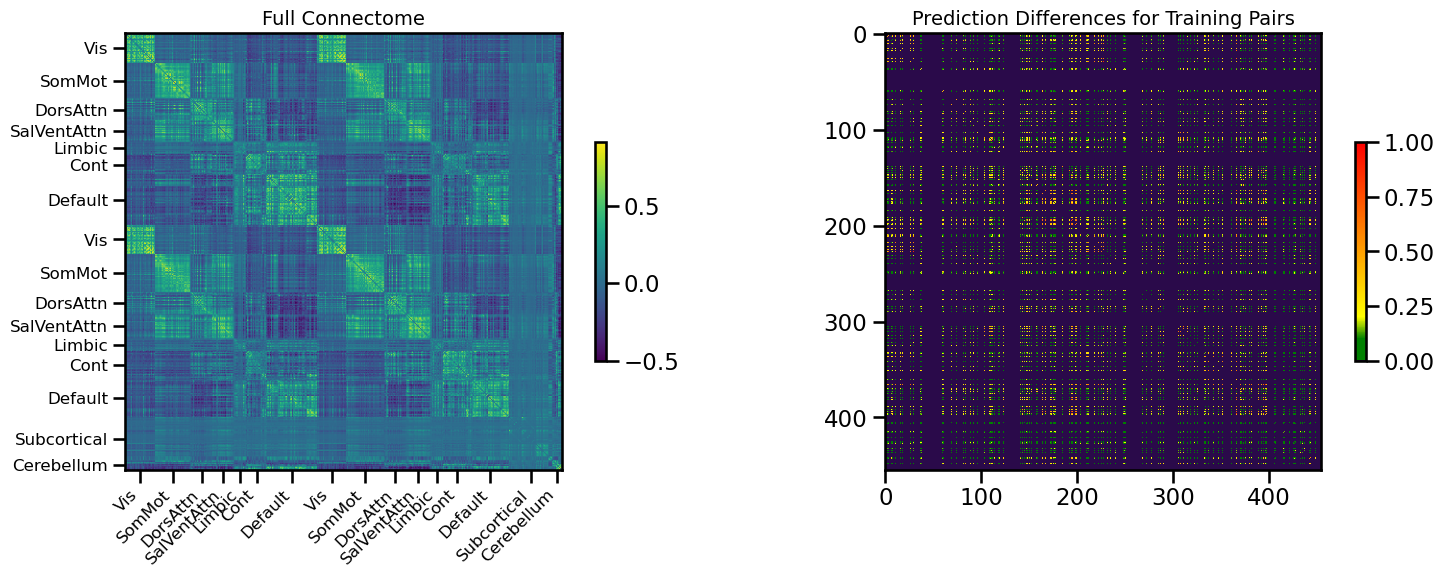

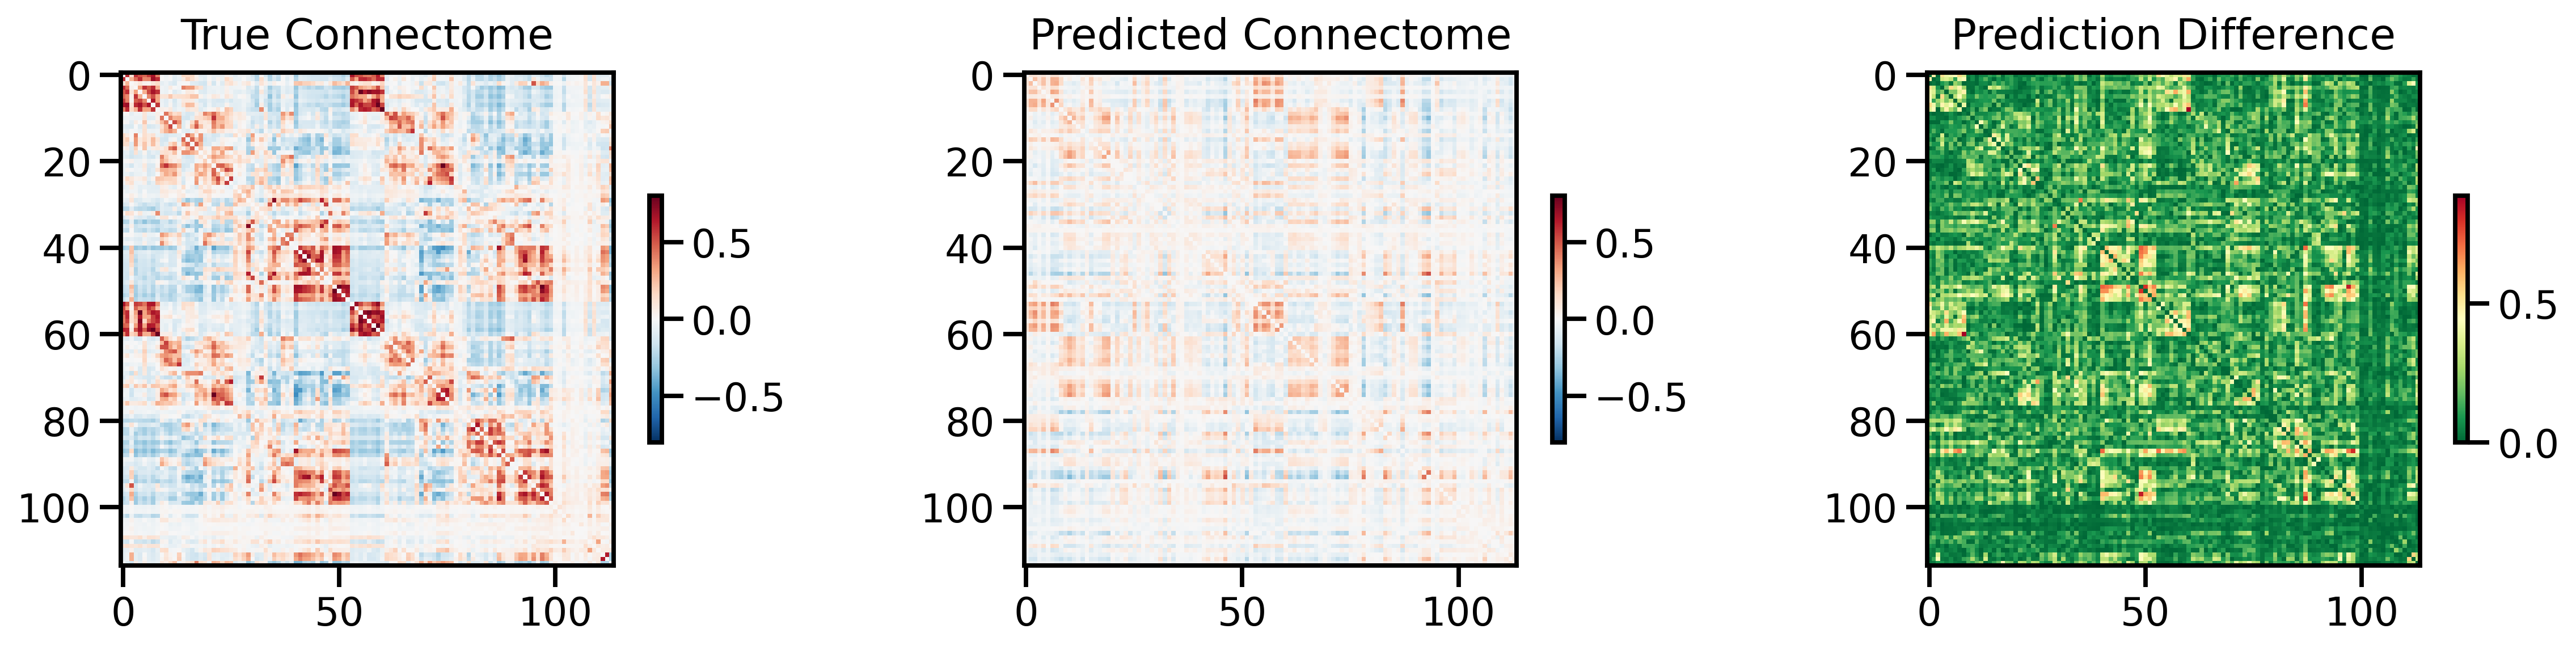

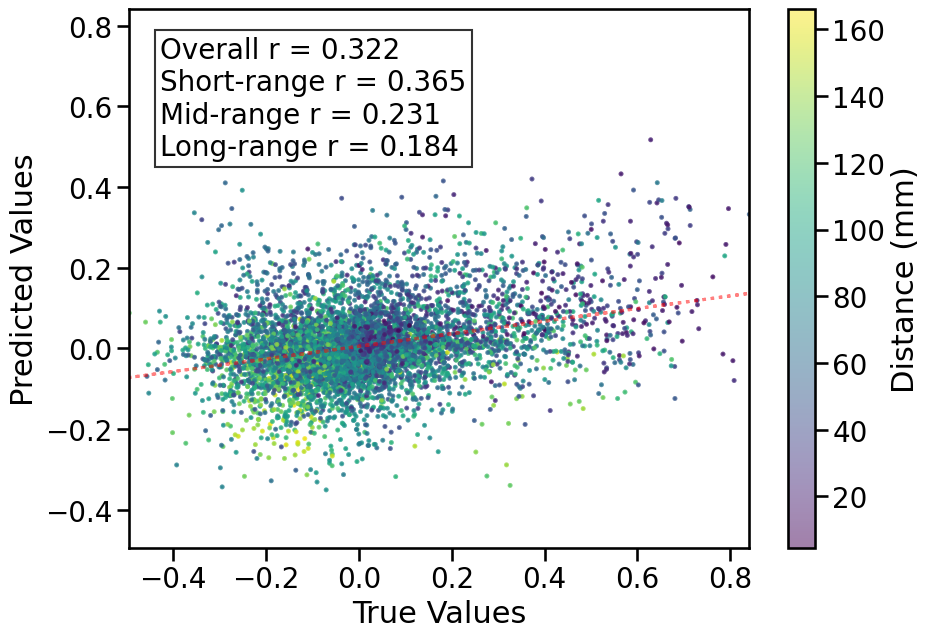


TRAIN METRICS: {'mse': 0.02159325, 'mae': 0.108276635, 'r2': 0.3519548063592969, 'pearson_r': 0.5993999687030506, 'short_r': 0.6024083070449434, 'mid_r': 0.5492955493193737, 'long_r': 0.5622042489714809, 'geodesic_distance': 30.56877157921565}
TEST METRICS: {'mse': 0.03331661, 'mae': 0.13428928, 'r2': 0.07502729620673476, 'pearson_r': 0.3218406876941517, 'short_r': 0.36541841894641014, 'mid_r': 0.23058578630043214, 'long_r': 0.1836294940776954, 'geodesic_distance': 18.75640870080179}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'activation': Identity(), 'learning_rate': 0.0001, 'epochs': 125, 'batch_size': 256, 'regularization': 'l2', 'lambda_reg': 0.001, 'shared_weights': True}
CPU Usage: 5.0%
RAM Usage: 7.6%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  6% |
Sim complete
Simulation completed in 116.76 seconds (1.95 minutes)


36736

In [9]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='bilinear_lowrank',
              use_gpu=True, 
              null_model='spin', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='pls_bilineardecoder',
              use_gpu=True, 
              null_model='spin', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

Spinning gene expression
Spin index for seed 42: 9
Mean error rank for spin index 9: 263.3333333333333
Number of components for 95% variance PCA: 27
Spinning gene expression
Spin index for seed 42: 9
Mean error rank for spin index 9: 263.3333333333333
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: z1dgbppn
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/z1dgbppn
Initialized sweep with ID: z1dgbppn


  warnings.warn(



1
3
4
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'n_components': 10, 'max_iter': 1000, 'scale': True, 'optimize_encoder': False, 'learning_rate': 0.0035, 'batch_size': 512, 'weight_decay': 0.01, 'epochs': 100}
X_train shape: torch.Size([341, 7380])
Y_train shape: torch.Size([341, 341])
Total number of parameters: 147722
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.06 GB
Best val loss so far at epoch 1: 69.1777
Best val loss so far at epoch 2: 25.6807
Best val loss so far at epoch 3: 11.5271
Best val loss so far at epoch 4: 6.1480
Best val loss so far at epoch 5: 3.7638
Epoch 5/100, Train Loss: 3.7618, Val Loss: 3.7638, Time: 2.28s
Best val loss so far at epoch 6: 2.5015
Best val loss so far at epoch 7: 1.7899
Best val loss so far at epoch 8: 1.2981
Best val loss so far at epoch 9: 0.9917
Best val loss so far at epoch 10: 0.7741
Epoch 10/100, Train Loss: 0.7230, Val Loss: 0.7741, Time: 2.45s
Best val loss so far at epoch 11: 0.6194
Best val loss so far 

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='pls_mlpdecoder',
              use_gpu=True, 
              null_model='spin', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='dynamic_mlp',
              use_gpu=True, 
              null_model='spin', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome_PCA': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='dynamic_mlp',
              use_gpu=True, 
              null_model='spin', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}, {'euclidean': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer_cls',
              use_gpu=True, 
              null_model='none', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True, 
              null_model='spin', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer_cls',
              use_gpu=True, 
              null_model='spin', 
              use_folds=[1])

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()